In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Data cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [5]:
df.duplicated().sum()

415

In [6]:
df.drop_duplicates(keep='first', inplace=True)

In [7]:
df.shape

(5157, 2)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

In [10]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# EDA (exploratory data analysis)

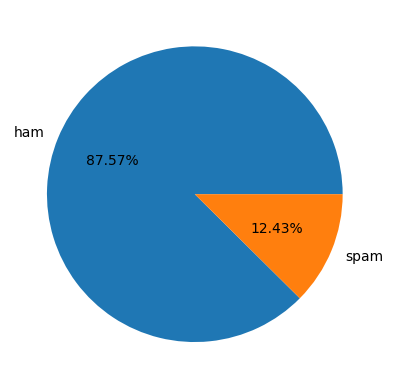

In [11]:
plt.pie(df['Category'].value_counts(), labels=['ham', 'spam'], autopct='%.2f%%');

In [12]:
import nltk

In [13]:
df['num_character'] = df['Message'].apply(len)

In [14]:
df.head()

,Category,Message,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
df['num_words'] = df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [16]:
df['num_sentence'] = df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [17]:
df.head()

,Category,Message,num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


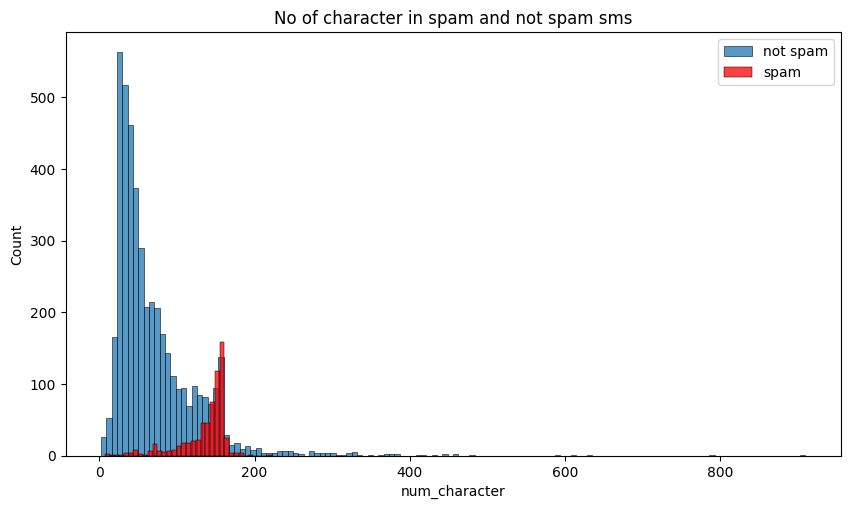

In [19]:
plt.figure(figsize=[10, 5.5])
plt.title('No of character in spam and not spam sms')
sns.histplot(df[df['Category'] == 0].iloc[:, 2], label='not spam')
sns.histplot(df[df['Category'] == 1].iloc[:, 2], label='spam', color='red')
plt.legend();

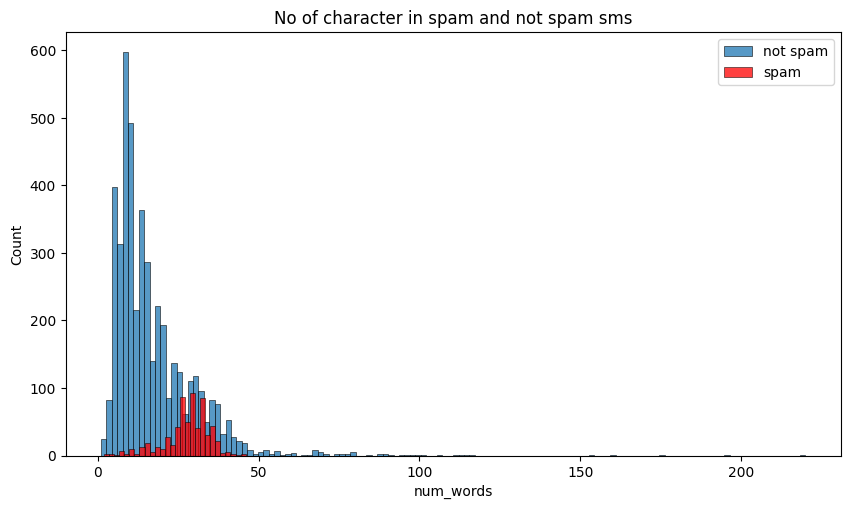

In [20]:
plt.figure(figsize=[10, 5.5])
plt.title('No of character in spam and not spam sms')
sns.histplot(df[df['Category'] == 0].iloc[:, 3], label='not spam')
sns.histplot(df[df['Category'] == 1].iloc[:, 3], label='spam', color='red')
plt.legend();

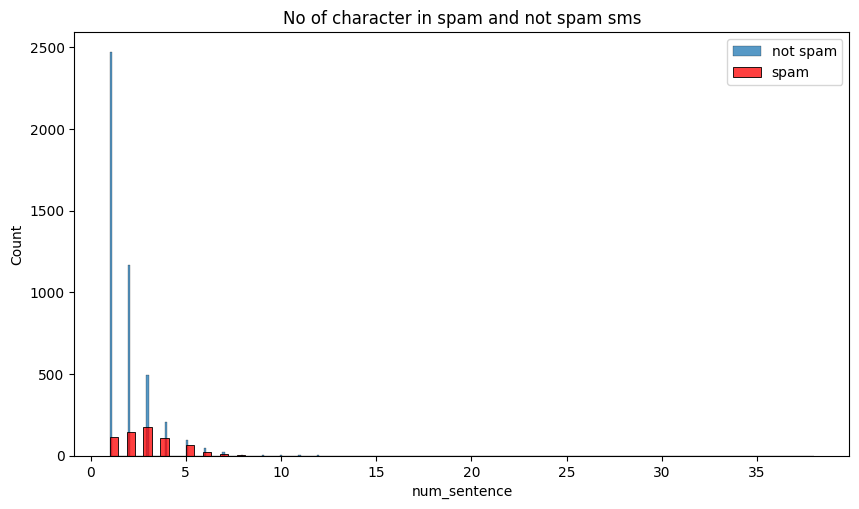

In [22]:
plt.figure(figsize=[10, 5.5])
plt.title('No of character in spam and not spam sms')
sns.histplot(df[df['Category'] == 0].iloc[:, 4], label='not spam')
sns.histplot(df[df['Category'] == 1].iloc[:, 4], label='spam', color='red')
plt.legend();

In [23]:
df.select_dtypes(include=np.number).corr()

,Category,num_character,num_words,num_sentence
Category,1.000000,0.374409,0.255968,0.259023
num_character,0.374409,1.000000,0.966155,0.622428
num_words,0.255968,0.966155,1.000000,0.679396
num_sentence,0.259023,0.622428,0.679396,1.000000


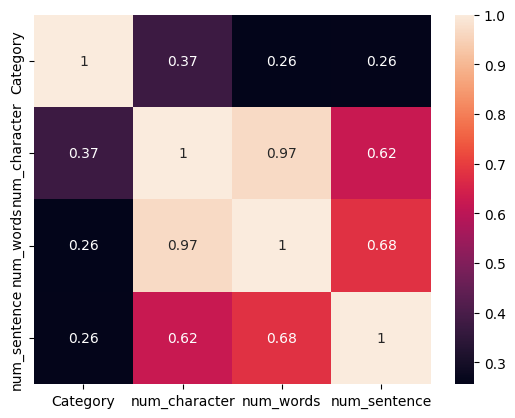

In [24]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True);

# Data preprocessing

1. lower case
2. tokenization
3. removing special characters
4. removing stop words and punctuations
5. stemming

In [25]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

In [26]:
ps = PorterStemmer()

In [27]:
def transform_text(text):
    text = text.lower()
    # print(text)
    text = nltk.word_tokenize(text)
    # print(text)

    # removing special character
    l = []
    for i in text:
        if i.isalnum():
            l.append(i)
    # print(l)

    # removing stop words and punctuation
    text = l.copy()
    l.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            l.append(i)
    # print(l)

    # appling steming
    text = l.copy()
    l.clear()
    for i in text:
        l.append(ps.stem(i))
    # print(l)

    return ' '.join(l)
        

In [29]:
df['transform_text'] = df['Message'].apply(transform_text)

In [30]:
# transform_text(df['Message'][4251])

In [31]:
from wordcloud import WordCloud

In [32]:
wc = WordCloud(background_color='black', height=500, min_font_size=10, width=500)

In [33]:
df[df['Category'] == 1]['transform_text'].str.cat(sep=' ')

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18 freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030 six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt messag click http england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq thank subscript rington uk mobil charg pleas confirm repli ye repli charg 07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow sm ac sptv new jersey devil detroit red w

In [34]:
spam_wc = wc.generate(df[df['Category'] == 1]['transform_text'].str.cat(sep=' '))

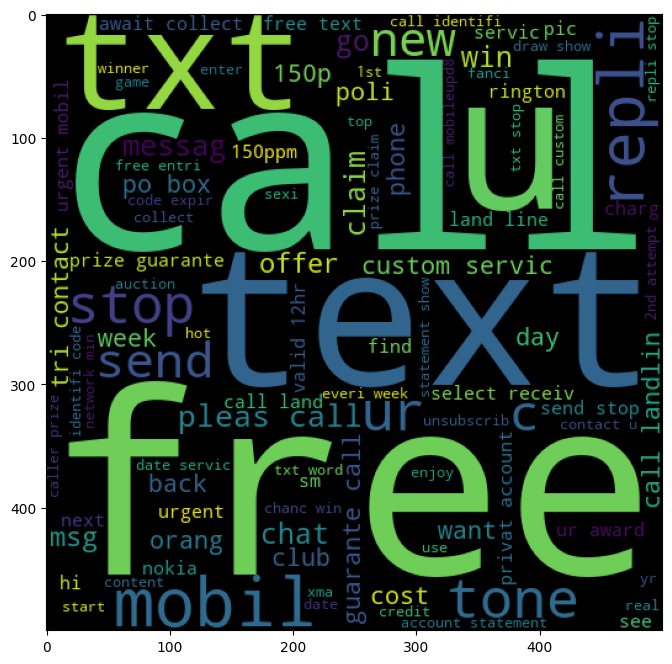

In [35]:
plt.figure(figsize=[8, 8])
plt.imshow(spam_wc);

In [36]:
not_spam_wc = wc.generate(df[df['Category'] == 0]['transform_text'].str.cat(sep=' '))

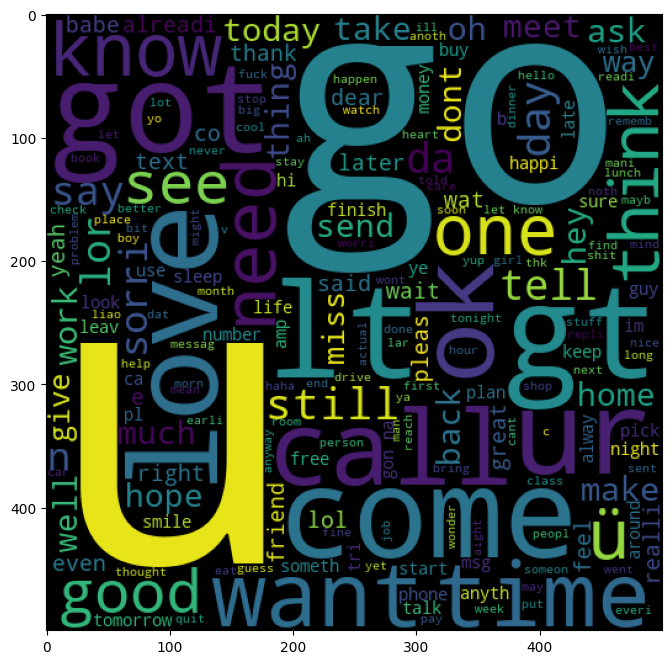

In [37]:
plt.figure(figsize=[8, 8])
plt.imshow(not_spam_wc);

In [40]:
spam_corpus = []
for msg in df[df['Category'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

print(spam_corpus)

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'click',

In [41]:
from collections import Counter

In [42]:
spam_df = pd.DataFrame(Counter(spam_corpus).most_common()).rename(columns={0 : 'words', 1 : 'count'})
spam_df

,words,count
0,call,311
1,free,186
2,2,154
3,txt,139
4,text,122
...,...,...
2227,shit,1
2228,bailiff,1
2229,hous,1
2230,087187272008,1


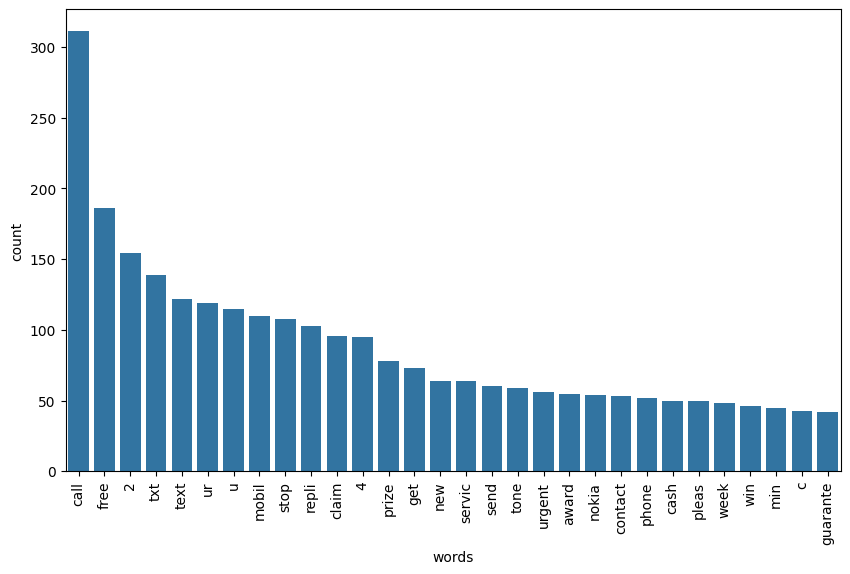

In [43]:
plt.figure(figsize=[10, 6])
sns.barplot(x='words', y='count', data=spam_df.head(30))
plt.xticks(rotation='vertical');

In [44]:
not_spam_corpus = []
for msg in df[df['Category'] == 0]['transform_text'].tolist():
    for word in msg.split():
        not_spam_corpus.append(word)

print(not_spam_corpus)

['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat', 'ok', 'lar', 'joke', 'wif', 'u', 'oni', 'u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say', 'nah', 'think', 'goe', 'usf', 'live', 'around', 'though', 'even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent', 'per', 'request', 'mell', 'oru', 'minnaminungint', 'nurungu', 'vettam', 'set', 'callertun', 'caller', 'press', '9', 'copi', 'friend', 'callertun', 'gon', 'na', 'home', 'soon', 'want', 'talk', 'stuff', 'anymor', 'tonight', 'k', 'cri', 'enough', 'today', 'search', 'right', 'word', 'thank', 'breather', 'promis', 'wont', 'take', 'help', 'grant', 'fulfil', 'promis', 'wonder', 'bless', 'time', 'date', 'sunday', 'oh', 'k', 'watch', 'eh', 'u', 'rememb', '2', 'spell', 'name', 'ye', 'v', 'naughti', 'make', 'v', 'wet', 'fine', 'way', 'u', 'feel', 'way', 'gota', 'b', 'serious', 'spell', 'name', 'go', 'tri', '2', 'month', 'ha', 'ha', 'joke', 'ü', '

In [45]:
not_spam_df = pd.DataFrame(Counter(not_spam_corpus).most_common()).rename(columns={0 : 'words', 1 : 'count'})
not_spam_df

,words,count
0,u,897
1,go,407
2,get,351
3,2,288
4,gt,288
...,...,...
5454,nmde,1
5455,dump,1
5456,heap,1
5457,salesman,1


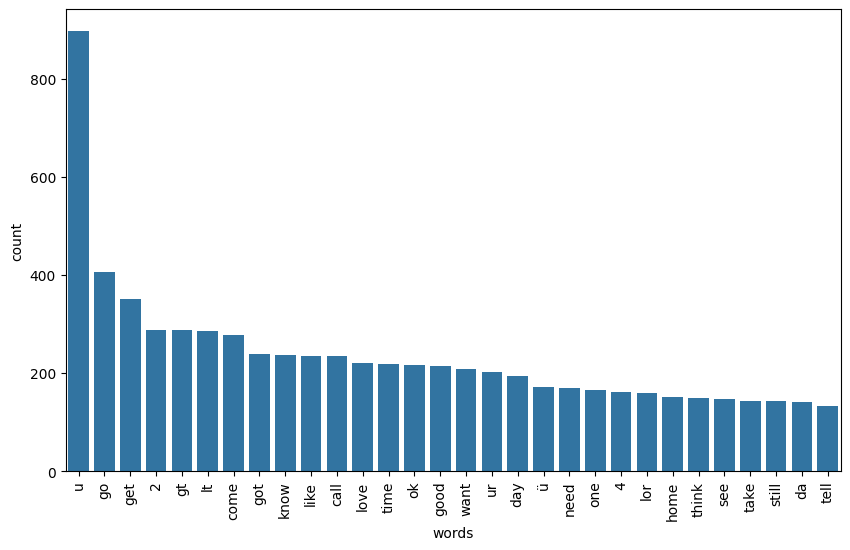

In [46]:
plt.figure(figsize=[10, 6])
sns.barplot(x='words', y='count', data=not_spam_df.head(30))
plt.xticks(rotation='vertical');

# Vectorization

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
tf = TfidfVectorizer(max_features=3000)

In [52]:
x = tf.fit_transform(df['transform_text']).toarray()
y = df['Category']

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Modeling 

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

In [56]:
svc = SVC()
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators=50, random_state=42)
ada = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=42)
gb = GradientBoostingClassifier(n_estimators=50, random_state=3)
xgb = XGBClassifier(n_estimators=50 , random_state=2)

In [2]:
clfs = {
    'SVC' : svc,
    'KNeighborsClassifier' : knc,
    'MultinomialNB' : mnb,
    'DecisionTreeClassifier' : dtc,
    'LogisticRegression' : lr,
    'RandomForestClassifier' : rf,
    'AdaBoostClassifier' : ada,
    'BaggingClassifier' : bc,
    'GradientBoostingClassifier' : gb,
    'XGBClassifier' : xgb
}

In [58]:
training_score = []
testing_score = []
prison_score = []

In [59]:
def training(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    #predict testing
    y_pred_test = clf.predict(x_test)
    #predict training
    y_pred_train = clf.predict(x_train)
    
    training_score.append(accuracy_score(y_train, y_pred_train))
    testing_score.append(accuracy_score(y_test,y_pred_test))
    prison_score.append(precision_score(y_test, y_pred_test))

    return accuracy_score(y_train, y_pred_train), accuracy_score(y_test,y_pred_test), precision_score(y_test, y_pred_test)

In [3]:
for name, clf in clfs.items():
    training, testing, precision = training(clf, x_train, y_train, x_test, y_test)

    print('for', name)
    print('training accuracy : ', training)
    print('testing accuracy : ', testing)
    print('precison accuracy : ', precision)

In [62]:
acc = pd.DataFrame({'algorithm' : clfs.keys(), 'training accuracy' : training_score, 'testing accuracy' : testing_score, 'pricision accuracy' : prison_score})

In [4]:
acc.sort_values('testing accuracy', ascending=False)

mnb preform good

In [64]:
import pickle
pickle.dump(tf, open('tff.pkl', 'wb'))
pickle.dump(mnb, open('mnb.pkl', 'wb'))